In [240]:
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm

In [241]:
SAMPLES = 5000000

radiuses = np.random.uniform(0, 1, SAMPLES) ** (1/2)
thetas = np.random.uniform(0, 2 * math.pi, SAMPLES)
xs, ys = to_cartesian(thetas, radiuses)

In [242]:
def to_cartesian(theta, r):
    return r * np.cos(theta), r * np.sin(theta)

In [243]:
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

def draw(xs, ys):
    plt.scatter(xs, ys, alpha=0.5, s=40)
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')

    plt.show()


In [244]:
def euclidean_distance_squared(x1, y1, x2, y2):
    return ((x1 - x2)) ** 2 + ((y1 - y2) ** 2)

In [245]:
def simulate_aaron_random(rs, thetas, erinsMove):
    assert len(rs) == len(thetas)
    samples = len(rs)
    xs, ys = to_cartesian(thetas, rs)

    aaron_thetas = np.random.uniform(0, 2 * math.pi, samples)
    
    aaron_xs, aaron_ys = to_cartesian(aaron_thetas, rs)
    erins_xs, erins_ys = to_cartesian(thetas, erinsMove)
    
    aarons_dist_squared = euclidean_distance_squared(aaron_xs, aaron_ys, xs, ys)
    erins_dist_squared = euclidean_distance_squared(erins_xs, erins_ys, xs, ys)

    aaron_wins = aarons_dist_squared < erins_dist_squared

    return np.average(aaron_wins)


In [246]:
erins_moves = np.linspace(start = 0.5, stop = 0.58, num = 20)
prob_aaron_wins = [simulate_aaron_random(radiuses, thetas, move) for move in tqdm(erins_moves)]

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:19<00:00,  1.03it/s]


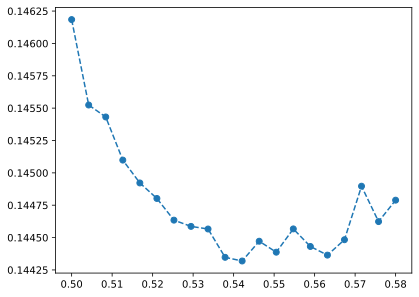

In [247]:
plt.plot(erins_moves, prob_aaron_wins, marker="o", linestyle="--")
plt.show()